In [1]:
import pandas as pd
import numpy as np
for i in range(1,68):
       !wget https://raw.githubusercontent.com/SuryaSheshank/Web-Traffic-Anomaly-Detection-using-C-LSTM/master/Dataset/real_{i}.csv -O X{i}.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable 

In [ ]:
#function to convert dataframe to into 2d array
def convert_2d(df_dup):
    data_frame = pd.DataFrame()
    for i in range(0, df_dup.shape[0]-59):
        is_anomaly = False
        mylist = []
        for j in range(i, i+60):
            mylist.append(df_dup['value'].iat[j])
            if df_dup['is_anomaly'].iat[j] == 1:
                is_anomaly = True
        if is_anomaly:
            mylist.append(1)
        else:
            mylist.append(0)
        np_Array = np.array(mylist)
        mylist = np_Array.T
        data_frame = data_frame.append(pd.Series(mylist), ignore_index=True)
    return data_frame;

In [7]:
#for concatenating all the files and
#Preprocessing the data
from sklearn import preprocessing
    all.files = []
    for i in range(1,68):
    all_files.append("X"+str(i)+".csv")


dataset_conc=[]
for filename in all_files:
    df=pd.read_csv(str(filename),index_col=None,header=0)
    df=df.replace(0,np.nan)
    df=df.dropna(axis=0, how='any',subset=['value'])
    df.value = preprocessing.normalize([df.value]).T
    dataset_conc.append(convert_2d(df)) 
frame=pd.concat(dataset_conc,axis=0,ignore_index=True)


ValueError: No objects to concatenate

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.timestamp,df.value)
plt.xlabel("Timestamp")
plt.ylabel("NormalizedValue")
plt.title(" Example plot of web traffic after preprocessing ")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Flatten,MaxPooling1D,Conv1D,LSTM
from keras import optimizers

Using TensorFlow backend.


In [ ]:
#building a classifier
model=Sequential()
model.add(Conv1D(64, kernel_size=10, strides=1, padding='same', activation='relu',input_shape=(60, 1)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(64, kernel_size=10, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Reshape((1,15*64)))
model.add(LSTM(64, activation='relu',return_sequences='False'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 60, 64)            704       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 30, 64)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 30, 64)            41024     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 15, 64)            0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 1, 960)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 64)             262400    
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [ ]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.026068,0.026184,0.026419,0.025958,0.025380,0.024741,0.025584,0.026244,0.027114,0.026844,0.026618,0.025602,0.026470,0.025580,0.029036,0.025032,0.025083,0.025430,0.024543,0.024186,0.024387,0.025024,0.024290,0.024399,0.023791,0.024759,0.024350,0.024768,0.024500,0.023993,0.023363,0.023821,0.024699,0.025747,0.025132,0.024668,0.025307,0.027054,0.027379,0.025974,0.026547,0.027954,0.025826,0.026003,0.025692,0.025832,0.025210,0.025620,0.026187,0.025933,0.026248,0.026422,0.025538,0.027617,0.025258,0.026398,0.026027,0.027960,0.026736,0.025262,0.0
1,0.026184,0.026419,0.025958,0.025380,0.024741,0.025584,0.026244,0.027114,0.026844,0.026618,0.025602,0.026470,0.025580,0.029036,0.025032,0.025083,0.025430,0.024543,0.024186,0.024387,0.025024,0.024290,0.024399,0.023791,0.024759,0.024350,0.024768,0.024500,0.023993,0.023363,0.023821,0.024699,0.025747,0.025132,0.024668,0.025307,0.027054,0.027379,0.025974,0.026547,0.027954,0.025826,0.026003,0.025692,0.025832,0.025210,0.025620,0.026187,0.025933,0.026248,0.026422,0.025538,0.027617,0.025258,0.026398,0.026027,0.027960,0.026736,0.025262,0.025795,0.0
2,0.026419,0.025958,0.025380,0.024741,0.025584,0.026244,0.027114,0.026844,0.026618,0.025602,0.026470,0.025580,0.029036,0.025032,0.025083,0.025430,0.024543,0.024186,0.024387,0.025024,0.024290,0.024399,0.023791,0.024759,0.024350,0.024768,0.024500,0.023993,0.023363,0.023821,0.024699,0.025747,0.025132,0.024668,0.025307,0.027054,0.027379,0.025974,0.026547,0.027954,0.025826,0.026003,0.025692,0.025832,0.025210,0.025620,0.026187,0.025933,0.026248,0.026422,0.025538,0.027617,0.025258,0.026398,0.026027,0.027960,0.026736,0.025262,0.025795,0.025594,0.0
3,0.025958,0.025380,0.024741,0.025584,0.026244,0.027114,0.026844,0.026618,0.025602,0.026470,0.025580,0.029036,0.025032,0.025083,0.025430,0.024543,0.024186,0.024387,0.025024,0.024290,0.024399,0.023791,0.024759,0.024350,0.024768,0.024500,0.023993,0.023363,0.023821,0.024699,0.025747,0.025132,0.024668,0.025307,0.027054,0.027379,0.025974,0.026547,0.027954,0.025826,0.026003,0.025692,0.025832,0.025210,0.025620,0.026187,0.025933,0.026248,0.026422,0.025538,0.027617,0.025258,0.026398,0.026027,0.027960,0.026736,0.025262,0.025795,0.025594,0.026973,0.0
4,0.025380,0.024741,0.025584,0.026244,0.027114,0.026844,0.026618,0.025602,0.026470,0.025580,0.029036,0.025032,0.025083,0.025430,0.024543,0.024186,0.024387,0.025024,0.024290,0.024399,0.023791,0.024759,0.024350,0.024768,0.024500,0.023993,0.023363,0.023821,0.024699,0.025747,0.025132,0.024668,0.025307,0.027054,0.027379,0.025974,0.026547,0.027954,0.025826,0.026003,0.025692,0.025832,0.025210,0.025620,0.026187,0.025933,0.026248,0.026422,0.025538,0.027617,0.025258,0.026398,0.026027,0.027960,0.026736,0.025262,0.025795,0.025594,0.026973,0.026307,0.0


In [ ]:
#train test split
y=frame.iloc[:, 60]
X=frame.iloc[:, 0:60]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [ ]:
#reshaping the data 
X_train=X_train.to_numpy()
nrows, ncols = X_train.shape
X_train = X_train.reshape(nrows, ncols, 1)

X_test=X_test.to_numpy()
nrows, ncols = X_test.shape
X_test = X_test.reshape(nrows, ncols, 1)

y_test = y_test.to_numpy()


In [ ]:
#converting y_train to categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train)

In [ ]:
#train the model
history=model.fit(x=X_train, y=y_train, batch_size=512, epochs=500, verbose=1)

Epoch 1/500
62107/62107 [==============================] - 2s 26us/step - loss: 0.3503 - accuracy: 0.9009
Epoch 2/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2696 - accuracy: 0.9186
Epoch 3/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2609 - accuracy: 0.9222
Epoch 4/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2552 - accuracy: 0.9233
Epoch 5/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2472 - accuracy: 0.9248
Epoch 6/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2434 - accuracy: 0.9254
Epoch 7/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2369 - accuracy: 0.9263
Epoch 8/500
62107/62107 [==============================] - 1s 17us/step - loss: 0.2328 - accuracy: 0.9276
Epoch 9/500
62107/62107 [==============================] - 1s 18us/step - loss: 0.2298 - accuracy: 0.9289
Epoch 10/500
62107/62107 [====================

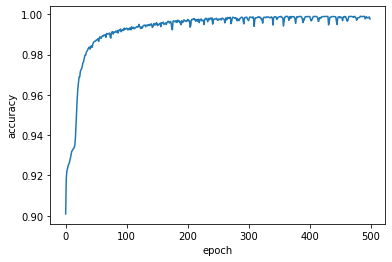

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [ ]:
  # list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


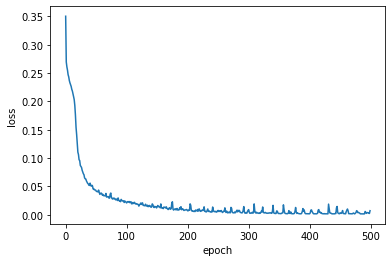

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
 #predicting on test data
  
y_pred=model.predict_classes(X_test)

In [ ]:
#evaluate performance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1_Score = f1_score(y_test, y_pred, average='binary')

In [ ]:
print("Confusion_Matrix")
print(Confusion_Matrix)
print("Accuracy ", Accuracy)
print("Precision ", precision)
print("recall ", recall)
print("f1_score ", F1_Score)

Confusion_Matrix
[[23509   784]
 [  627  1698]]
Accuracy  0.9469907581335938
Precision  0.6841257050765511
recall  0.7303225806451613
f1_score  0.7064697316413563
